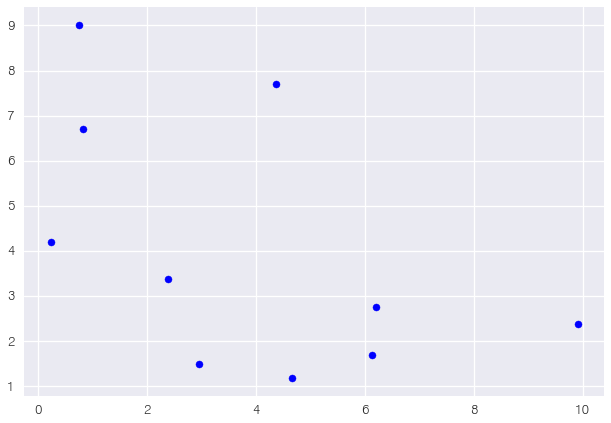

In [2]:
# 계측적 클러스터링
# 응집형(Agglomerative) 계층적 클러스터링 기법

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 교차 검증(Cross Vaildation)
#from sklearn.cross_validation import train_test_split

# k-means 클러스터링
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 계층적 클러스터링
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage # 응집형(Agglomerative)
from scipy.cluster.hierarchy import dendrogram # 응집형(Agglomerative) 
from sklearn.cluster import AgglomerativeClustering # 응집형(Agglomerative) 


style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False


np.random.seed(111)
var = ['X', 'Y']
labels = ['점0', '점1', '점2', '점3', '점4', '점5', '점6', '점7', '점8', '점9']
X = np.random.random_sample([10,2])*10
df = pd.DataFrame(X, columns=var, index=labels)


plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)


In [3]:

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)


print(row_dist)


          점0        점1        점2        점3        점4         점5         점6  \
점0  0.000000  6.254970  3.174696  6.409487  4.097740   3.847181   7.297040   
점1  6.254970  0.000000  6.358690  5.411807  4.745963   7.682259   3.685956   
점2  3.174696  6.358690  0.000000  3.846035  1.968201   7.010041   5.627679   
점3  6.409487  5.411807  3.846035  0.000000  2.314338   9.852831   2.561945   
점4  4.097740  4.745963  1.968201  2.314338  0.000000   7.586406   3.674096   
점5  3.847181  7.682259  7.010041  9.852831  7.586406   0.000000  10.068472   
점6  7.297040  3.685956  5.627679  2.561945  3.674096  10.068472   0.000000   
점7  1.055743  5.285139  3.490988  6.163007  3.877791   3.712708   6.692931   
점8  1.545048  6.515932  1.736486  5.366800  3.160088   5.379009   6.723871   
점9  9.083304  3.852438  7.835325  4.832992  5.867163  11.314026   2.312871   

          점7        점8         점9  
점0  1.055743  1.545048   9.083304  
점1  5.285139  6.515932   3.852438  
점2  3.490988  1.736486   7.835325

In [4]:

row_clusters = linkage(distmatrix, method='complete')
#row_clusters = linkage(df.values, method='complete', metric='euclidean)

pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index=['클러스터 %d' %(i+1) for i in range(row_clusters.shape[0])])


,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,0.0,7.0,1.055743,2.0
클러스터 2,2.0,8.0,1.736486,2.0
클러스터 3,6.0,9.0,2.312871,2.0
클러스터 4,3.0,4.0,2.314338,2.0
클러스터 5,10.0,11.0,3.490988,4.0
클러스터 6,1.0,12.0,3.852438,3.0
클러스터 7,13.0,15.0,5.867163,5.0
클러스터 8,5.0,14.0,7.010041,5.0
클러스터 9,16.0,17.0,11.314026,10.0


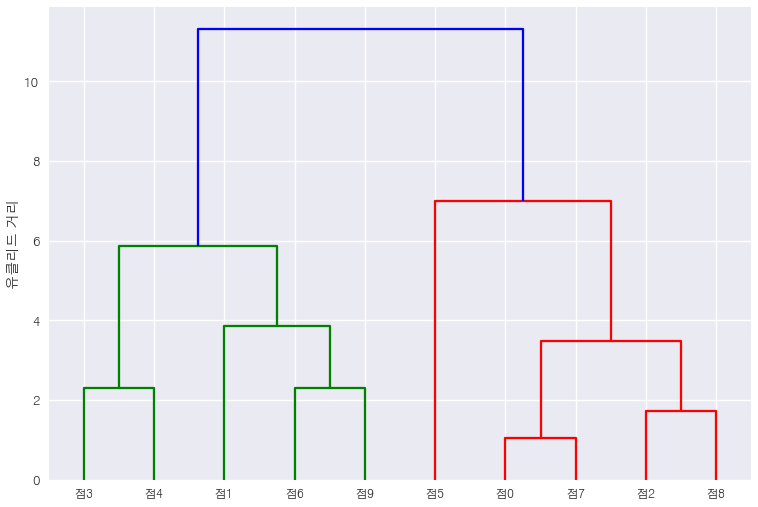

In [5]:
# 덴드로그램(dendregram, 계통도)

row_dendr = dendrogram(row_clusters, labels=labels)


plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()


In [6]:
# heatmap 표시를 원할 경우 활성화
#cm = np.corrcoef(df[labels].values.T)
#sns.set(font_scale=1.5)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=labels, xticklabels=var)
#plt.show()

# 히트맵으로 표현하기 [M24]
# 일단은 구현 하였음

In [7]:
X

array([[ 6.12170176,  1.69069754],
       [ 4.36059019,  7.69262473],
       [ 2.95325304,  1.49162957],
       [ 0.22478325,  4.20224492],
       [ 2.38682141,  3.37656192],
       [ 9.90712465,  2.37726454],
       [ 0.81192659,  6.69600238],
       [ 6.21242919,  2.7425353 ],
       [ 4.6622141 ,  1.18367751],
       [ 0.73957564,  9.00774179]])

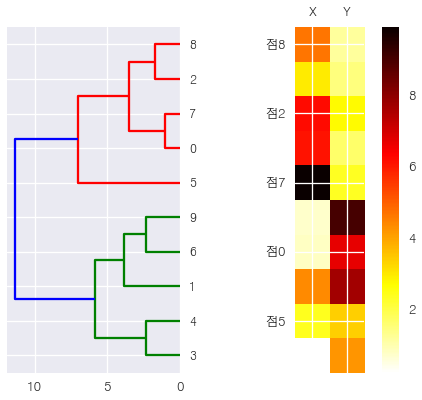

In [20]:
# 히트맵 구현

fig = plt.figure(figsize=(8, 8))
#axd = fig.add_axes([6.12170176, 4.36059019, 2.95325304, 0.22478325, 2.38682141, 9.90712465, 0.81192659, 6.21242919, 4.6622141, 0.73957564])
axd = fig.add_axes([0.09, 0.1, 0.3, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.ix[row_dendr['leaves'][::-1]]
#axm = fig.add_axes([1.69069754, 7.69262473, 1.49162957, 4.20224492, 3.37656192, 2.37726454, 6.69600238, 2.7425353, 1.18367751, 9.00774179])
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

#axd.set_xticks([])
#axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

In [9]:
# AgglomerativeClustering라는 sklearn 인자를 사용하여 응집형 계층적 클러스터링 수행
# scipy와 scikit-learn을 사용했을 때 동일한 결과가 나옴을 확인하였음.

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)


print('클러스터 분류 결과: ', labels)

# 클러스터 개수를 먼저 지정하지 않고 만들어야 하는 것 아닌가? [M25]
# AgglomerativeClustering 인자 확인 후 디폴트값이 n_culsters=2 임을 확인
# 조금 찝찝한 기분이다.

클러스터 분류 결과:  [0 1 0 1 1 0 1 0 0 1]
